In [66]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro

In [1134]:
dataOrj = pd.read_excel ("HW_Data_Set.xlsx")
data = dataOrj.copy()
data2=dataOrj.copy()
data3=dataOrj.copy()
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [1059]:
data.isnull().values.any() # Veride null değer bulunmamakta

False

In [1060]:
#Hiç bir değişken normal dağılımdan gelmiyor
for i in range (len(data.columns)):
    if (data.dtypes[i]!=object):   
        stat,p = shapiro(data.iloc[:,i])
        if (p>0.05):
            print ("{} column's P value is: {}".format(data.columns[i],p))
                          

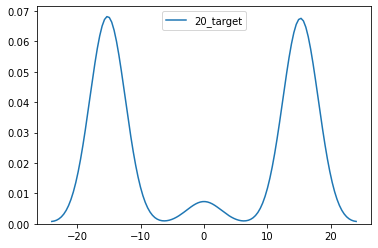

In [1061]:
sns.kdeplot(data["20_target"]) # 20_target verisini response olarak seçtim ve bunun üzerinden regresyon yapacağım.
# hedef değişkeni dağılımına baktığımda 3 farklı dağılıma sahip veri seti varmış gibi görüküyor. 
#bu setleri ayırıp ayrı ayrı regresyon modeli oluşturacağım

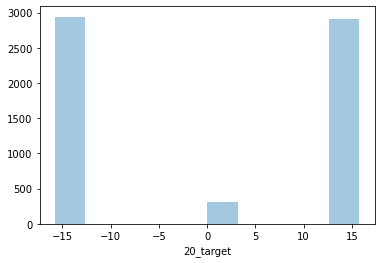

In [1062]:
# Bağımlı değişkenlerin aralıkları burada belli oluyor.
#Görüldüğü üzere -40 ile -30 arasında bir dağılım , 0 ile 10 arasında bir dağılım ve 30 ile 40 arasında bir dağılım var.
#Verileri ayırıp 3 grupda inceleyeceğim.
sns.distplot(data["20_target"],kde = False)

In [1063]:
#Hedef kolonlarının ayrılması
targetVal=data.iloc[:,-3:]

In [1064]:
# Verileri sol , orta ve sağ dağılım olarak ayırdım. 
leftDist= data.loc[:,:][(data["20_target"] > -20) & (data["20_target"] <-10)]
midDist=data.loc[:,:][(data["20_target"] > -5) & (data["20_target"] <5)]
rightDist= data.loc[:,:][(data["20_target"] > 10) & (data["20_target"] < 20)]

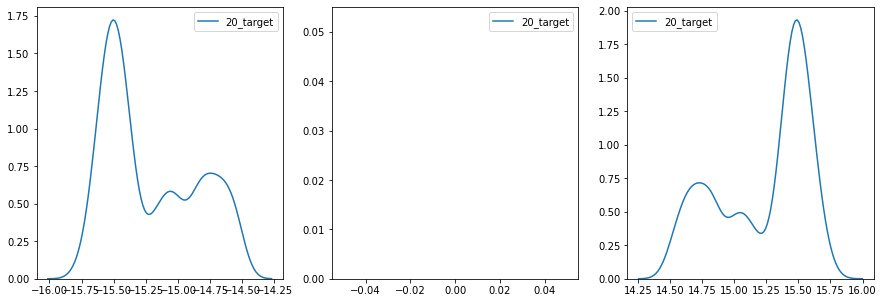

In [1065]:
#Ayrılan verilerin dağılımlarının ayrı ayrı gösterilmesi.
import warnings
warnings.filterwarnings("ignore")
figg=plt.figure(figsize=(15,5))
ax1=plt.subplot(1,3,1)
sns.kdeplot(leftDist.iloc[:,-3])
ax2=plt.subplot(1,3,2)
sns.kdeplot(midDist.iloc[:,-3])
ax3=plt.subplot(1,3,3)
sns.kdeplot(rightDist.iloc[:,-3])

In [1066]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Manipüle edilmemiş veri ile regresyon

In [1067]:
#İlk önce verinin x  ve y lerini ayırdım. 
#Ardından X ler için multicollinearity check yaparak değeri 20 altında olanları seçeceğim.

In [1068]:
# orjinal datanın X değerlerinin vif testine girebilmesi için tipi obje olan kolonların ayrımı
dropNames=[]
leftColumnNumbers =[]
for i in range (len(data2.columns)):
    
    if (data2.dtypes[i]==object):
        dropNames.append(data2.columns[i])
        
data2=data2.drop(columns=dropNames)   

In [1069]:
# X lerin ayrımı
data2Xvalues = data2.iloc[:,:-3]

In [1070]:
# multicollinearity check
vifData2 = [variance_inflation_factor(data2Xvalues.values, i) for i in range(data2Xvalues.shape[1])]

In [1071]:
columnNames = data2Xvalues.columns

In [1072]:
# vif değerlerinin ve karşılık gelen kolonların oluşturulması
newdata2Df=pd.DataFrame(vifData2,columnNames)
newdata2Df.columns = ["Vif Degeri"]
newdata2Df.head()

,Vif Degeri
ind_5,1898.750925
ind_6,1240.114364
ind_8,inf
ind_9,inf
ind_10,inf


In [1073]:
# Burada vif değeri 20 altında olanları alıyorum.
cleanData2=data2.loc[:,newdata2Df.iloc[:][newdata2Df["Vif Degeri"] < 20].index]

In [1074]:
cleanData2 = pd.concat([cleanData2, data2.iloc[:,-3]], axis=1, sort=False)

In [1075]:
# vif değeri 20nin altında olan 45 adet kolon varmış.
cleanData2.head(10)

,ind_13,ind_28,ind_29,ind_36,ind_37,ind_41,ind_53,ind_56,ind_62,ind_65,...,ind_345,ind_347,ind_349,ind_351,ind_352,ind_397,ind_412,ind_416,ind_424,20_target
0,60.808814,66.666667,93.692449,196.592517,184.819232,30.752568,24,19,10,9,...,0.0,0.0,0.0,0.0,0.0,-26.386973,0.002371,-49.6,1.000000,15.135802
1,64.366798,66.666667,76.694104,201.738617,191.985663,36.812130,20,20,10,9,...,0.0,0.0,0.0,0.0,0.0,-26.085949,0.003074,-55.6,1.000000,15.143348
2,65.915803,66.666667,83.909974,205.238017,197.993551,39.648290,17,19,11,10,...,0.0,0.0,0.0,0.0,0.0,-23.250410,0.003561,-58.4,1.000000,15.146870
3,68.584234,66.666667,98.596644,203.641362,200.370912,40.902782,14,17,11,10,...,0.0,0.0,0.0,0.0,0.0,-19.499975,0.004366,-61.8,1.000000,15.153283
4,76.455495,66.666667,149.283572,227.848369,223.561880,48.462194,28,20,12,11,...,0.0,0.0,0.0,0.0,0.0,-25.348270,0.004198,-79.8,1.000000,-15.179065
5,74.144360,66.666667,100.720013,228.751455,228.992445,48.452317,26,24,14,12,...,0.0,0.0,0.0,0.0,0.0,0.600000,0.005395,-78.1,1.000000,-15.176927
6,73.412327,66.666667,79.057155,223.798458,229.258543,46.135635,21,23,15,13,...,0.0,0.0,0.0,0.0,0.0,5.370845,0.005749,-71.7,1.000000,-15.176298
7,69.155269,-66.666667,24.398625,202.866184,215.404916,38.334029,9,17,14,12,...,0.0,0.0,0.0,0.0,0.0,0.700000,0.005111,-69.0,0.432099,-15.172902
8,58.458047,-66.666667,-88.400901,188.153517,205.847845,32.929701,-10,12,13,12,...,0.0,0.0,0.0,0.0,0.0,4.750000,0.004135,-62.7,0.000000,-15.164979
9,59.819306,-66.666667,-99.458395,177.901482,199.401685,28.025281,-8,-2,12,11,...,0.0,0.0,0.0,0.0,0.0,-0.750000,0.004095,-64.6,0.000000,-15.167369


In [1076]:
# Korelasyon matrisinin renkli gösterimi
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val >= 0.5 or val <=-0.5 else 'black'
    return 'color: %s' % color

In [1077]:
corrDF=round(cleanData2.corr(),3)

In [1078]:
corrDF.style.applymap(color_negative_red)

In [1079]:
# 20_target bağımlı değişkeni ile korelasyonu 0.001 den büyük ve -0.001 den küçük değerlerin indexleri bunlar. bu indexler ile regresyon deneyeceğim
regressionIndexes=corrDF[(corrDF["20_target"] >0.001) | (corrDF["20_target"] < -0.001)].index

In [1080]:
regressionData = data2[regressionIndexes]
y=regressionData.iloc[:,-1]
X=regressionData.iloc[:,:-1]
X=sm.add_constant(X)


In [1081]:
# Tüm veriler ile regresyon model oluşturduğumuzda r - square çok düşük görükmekte (r2=0.030)
lm= sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.509
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           3.22e-20
Time:                        14:28:01   Log-Likelihood:                -25288.
No. Observations:                6167   AIC:                         5.066e+04
Df Residuals:                    6124   BIC:                         5.095e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8370      0.740     -1.132      0.258      -2.287       0.613
ind_13        -0.0022      0.006     -0.376      0.707      -0.014       0.009
ind_28         0.0003      0.004      0.065      0.948      -0.008       0.009
ind_29        -0.0091      0.005     -2.002      0.045      -0.018      -0.000
ind_36        -0.0104      0.006     -1.825      0.068      -0.021       0.001
ind_37         0.0254      0.006      4.493      0.000       0.014       0.037
ind_41        -0.0375      0.021     -1.763      0.078      -0.079       0.004
ind_53        -0.0041      0.026     -0.157      0.875      -0.055       0.047
ind_56        -0.0329      0.034     -0.974      0.330      -0.099       0.033
ind_62         0.0637      0.043      1.491      0.136      -0.020       0.147
ind_65         0.0282      0.047      0.593      0.553      -0.065       0.121
ind_71        -0.0023      0.048     -0.047      0.962      -0.096       0.092
ind_74        -0.1916      0.061     -3.165      0.002      -0.310      -0.073
ind_77         0.1014      0.050      2.013      0.044       0.003       0.200
ind_82         0.4308      0.410      1.051      0.293      -0.372       1.234
ind_83        -0.0086      0.029     -0.297      0.766      -0.065       0.048
ind_88      -332.1457    353.919     -0.938      0.348   -1025.952     361.660
ind_134        0.0512      0.043      1.178      0.239      -0.034       0.136
ind_172        0.0307      0.011      2.756      0.006       0.009       0.053
ind_176        0.0023      0.010      0.240      0.811      -0.017       0.021
ind_179        0.0270      0.054      0.497      0.619      -0.079       0.133
ind_237        0.0144      0.006      2.395      0.017       0.003       0.026
ind_239    -2882.3778   1446.552     -1.993      0.046   -5718.129     -46.627
ind_309     2685.9068   3184.772      0.843      0.399   -3557.365    8929.179
ind_310        0.7504      0.477      1.574      0.116      -0.184       1.685
ind_321       -0.0091      0.006     -1.616      0.106      -0.020       0.002
ind_324    -4733.6879   1890.025     -2.505      0.012   -8438.801   -1028.575
ind_327       -0.0101      0.007     -1.402      0.161      -0.024       0.004
ind_330        1.0972      0.729      1.505      0.132      -0.332       2.526
ind_332        0.0396      0.010      3.895      0.000       0.020       0.059
ind_334    -5800.3711   5412.962     -1.072      0.284   -1.64e+04    4810.937
ind_338        1.4428      1.189      1.214      0.225      -0.887       3.773
ind_340        6.4998      2.516      2.584      0.010       1.568      11.432
ind_344    -9726.0584   7608.174     -1.278      0.201   -2.46e+04    5188.637
ind_345       -1.1964     11.680     -0.102      0.918     -24.094      21.701
ind_347       -0.0867      0.063     -1.372      0.170      -0.211       0.037
in

In [1082]:
#p>0.05 değerlerinin modelden atılması
X = X[model.pvalues[model.pvalues<0.05].index]
X.head(1)

,ind_29,ind_37,ind_74,ind_77,ind_172,ind_237,ind_239,ind_324,ind_332,ind_340,ind_412
0,93.692449,184.819232,8,8,8.133485,10.0,0.000217,-0.000062,20.967742,-0.319064,0.002371


In [1083]:
# t  değerlerinin atılarak modelin tekrar oluşturulması.
# görüldüğü üzere modelin rsquare değeri hala düşük
lm= sm.OLS(y,X) 
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              20_target   R-squared (uncentered):                   0.020
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              11.23
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    5.96e-21
Time:                        14:28:06   Log-Likelihood:                         -25321.
No. Observations:                6167   AIC:                                  5.066e+04
Df Residuals:                    6156   BIC:                                  5.074e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_29        -0.0085      0.002     -4.025      0.000      -0.013      -0.004
ind_37         0.0137      0.003      4.575      0.000       0.008       0.020
ind_74        -0.1719      0.046     -3.724      0.000      -0.262      -0.081
ind_77         0.0839      0.048      1.752      0.080      -0.010       0.178
ind_172        0.0216      0.010      2.233      0.026       0.003       0.041
ind_237        0.0006      0.004      0.166      0.868      -0.007       0.008
ind_239    -3597.4081   1381.384     -2.604      0.009   -6305.404    -889.412
ind_324     -819.6562   1495.422     -0.548      0.584   -3751.206    2111.893
ind_332        0.0295      0.006      4.781      0.000       0.017       0.042
ind_340        4.3294      2.159      2.005      0.045       0.097       8.562
ind_412      113.0945     38.777      2.917      0.004      37.078     189.111
==============================================================================
Omnibus:                    23142.337   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              901.409
Skew:                           0.003   Prob(JB):                    1.83e-196
Kurtosis:                       1.127   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dağılımlar sol orta ve sağ şekilde ayrıldıktan sonra regresyon oluşturulması.

### Sol Dağılım Regresyon Modeli

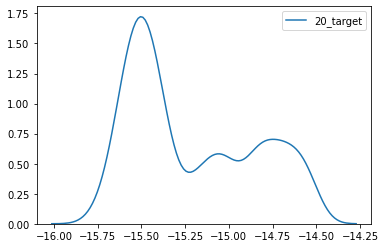

In [1084]:
sns.kdeplot(leftDist.iloc[:,-3])

In [1085]:
# Object olan kolonların çıkarılması
dropNames=[]
leftColumnNumbers =[]
for i in range (len(leftDist.columns)):
    
    if (leftDist.dtypes[i]==object):
        dropNames.append(leftDist.columns[i])
        
leftDist=leftDist.drop(columns=dropNames)   

In [1086]:
# sol taraftaki dağılımdan targetlerin çıkartılıp X değerlerinin oluşturulması
left_X=leftDist.iloc[:,:-3]

In [1087]:
#Sol taraftaki dağılımın X değerlerinin multicollinearity testinin yapılması
#VIF determines the strength of the correlation between the independent variables. 
#It is predicted by taking a variable and regressing it against every other variable. 
vifLeft = [variance_inflation_factor(left_X.values, i) for i in range(left_X.shape[1])]


In [1088]:
columnNames = left_X.columns

In [1089]:
# vif değerlerinin ve karşılık gelen kolonların oluşturulması
newDf=pd.DataFrame(vifLeft,columnNames)
newDf.columns = ["Vif Degeri"]
newDf.head()

,Vif Degeri
ind_5,1998.013601
ind_6,1359.278992
ind_8,inf
ind_9,inf
ind_10,inf


In [1090]:
#10' dan küçük vif değerlerinin olduğu  değişkenler ile yeni bir dataframe oluşturulması.
cleanLeftData=leftDist.loc[:,newDf.iloc[:][newDf["Vif Degeri"] < 10].index]

In [1091]:
cleanLeftData = pd.concat([cleanLeftData, leftDist.iloc[:,-3]], axis=1, sort=False)

In [1092]:
cleanLeftData.shape

(2940, 29)

In [1093]:
cleanLeftData.head()

,ind_28,ind_53,ind_71,ind_77,ind_83,ind_88,ind_134,ind_172,ind_176,ind_217,...,ind_332,ind_334,ind_338,ind_340,ind_344,ind_397,ind_412,ind_416,ind_424,20_target
4,66.666667,28,9,8,8,0.001644,20,20.002105,-20.453871,2,...,20.312500,-0.000091,1.197600,-0.318155,0.0,-25.348270,0.004198,-79.8,1.000000,-15.179065
5,66.666667,26,9,8,8,0.000584,7,22.018378,-5.720335,2,...,20.155039,-0.000091,1.197691,-0.318200,0.0,0.600000,0.005395,-78.1,1.000000,-15.176927
6,66.666667,21,10,9,8,0.000292,4,14.964161,3.716341,2,...,20.000000,-0.000091,1.197781,-0.318213,0.0,5.370845,0.005749,-71.7,1.000000,-15.176298
7,-66.666667,9,10,9,8,0.000000,-10,3.866189,11.180839,0,...,19.847328,-0.000091,1.197872,-0.318284,0.0,0.700000,0.005111,-69.0,0.432099,-15.172902
8,-66.666667,-10,10,9,8,0.000000,-2,-8.498562,17.618163,0,...,19.696970,-0.000091,1.197962,-0.318450,0.0,4.750000,0.004135,-62.7,0.000000,-15.164979


In [1094]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val >= 0.5 or val <=-0.4 else 'black'
    return 'color: %s' % color

In [1095]:
corrDF=round(cleanLeftData.corr(),3)

In [1096]:
corrDF.style.applymap(color_negative_red)

,ind_28,ind_53,ind_71,ind_77,ind_83,ind_88,ind_134,ind_172,ind_176,ind_217,ind_237,ind_239,ind_309,ind_310,ind_315,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_397,ind_412,ind_416,ind_424,20_target
ind_28,1,0.525,0.037,0.041,0.023,-0.022,0.563,0.037,-0.134,0.001,-0.011,-0.001,-0.015,0.025,0.004,-0.004,-0.019,0.008,-0.006,0.038,0.011,0.008,-0.033,0.001,-0.449,0.005,-0.11,0.581,0.004
ind_53,0.525,1,0.185,0.127,0.073,-0.044,0.675,0.296,-0.106,0.004,-0.025,-0.024,0.023,0.033,0.013,0.009,-0.04,0.012,-0.038,0.075,0,0.014,-0.034,-0.004,-0.531,0.091,-0.212,0.671,-0.031
ind_71,0.037,0.185,1,0.796,0.449,0.029,0.08,0.029,0.199,-0.244,0.024,-0.206,-0.045,-0.048,-0.057,0.334,-0.383,0.201,-0.161,0.239,-0.209,0.21,-0.194,-0.138,-0.063,0.497,-0.344,0.083,-0.098
ind_77,0.041,0.127,0.796,1,0.654,0.018,0.067,-0.02,0.102,-0.268,0.036,-0.142,0.028,-0.087,-0.127,0.402,-0.404,0.266,-0.24,0.306,-0.229,0.243,-0.203,-0.133,-0.04,0.382,-0.278,0.08,-0.168
ind_83,0.023,0.073,0.449,0.654,1,0.028,0.041,-0.009,0.022,-0.244,0.121,-0.057,0.142,-0.12,-0.252,0.461,-0.344,0.328,-0.345,0.378,-0.231,0.244,-0.18,-0.118,-0.033,0.174,-0.227,0.053,-0.292
ind_88,-0.022,-0.044,0.029,0.018,0.028,1,0.112,-0.033,-0.007,0.018,0.038,-0.139,0.017,0.004,-0.011,0.023,0.046,0.005,0.007,-0.003,-0.019,0.009,-0.005,0.051,0.01,0.073,0.014,-0.012,-0.032
ind_134,0.563,0.675,0.08,0.067,0.041,0.112,1,0.111,-0.154,0.023,-0.024,-0,0.029,0.025,0,0.013,-0.029,0.013,-0.036,0.067,-0.006,0.026,-0.037,-0.019,-0.434,0.042,-0.132,0.515,-0.025
ind_172,0.037,0.296,0.029,-0.02,-0.009,-0.033,0.111,1,-0.152,0.05,-0.029,0.073,0.023,0.013,0.044,-0.081,0.12,-0.054,-0.041,0.016,0.02,-0.023,0.014,0.047,-0.115,-0.019,0,0.158,-0.018
ind_176,-0.134,-0.106,0.199,0.102,0.022,-0.007,-0.154,-0.152,1,-0.097,-0.005,-0.069,-0.038,0.068,0.023,0.045,-0.04,0.016,-0.013,0.05,-0.145,0.115,-0.015,-0.025,0.147,0.11,-0.119,-0.102,0.031
ind_217,0.001,0.004,-0.244,-0.268,-0.244,0.018,0.023,0.05,-0.097,1,-0.038,-0.133,-0.011,0.012,0.029,-0.167,0.085,-0.039,0.141,-0.147,0.126,-0.107,0.1,0.07,-0.004,-0.098,0.084,0.012,-0.047


In [1097]:
# X ve y lerin ayrışması
y = cleanLeftData["20_target"]
X=cleanLeftData.iloc[:,:-1]
X=sm.add_constant(X)

In [1098]:
# Train - Split yapılıp daha sonrası için modelin doğruluğunun test edilmesi
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

In [1099]:
# Train verileri ile modelin eğitilmesi
#Sağ taraftaki dağılıma göre r square değerimiz 0.536. Bütün verilere göre kurulan modele göre değeri çok yükselmiş durumda.
lm= sm.OLS(y_train,X_train) 
modelLeft = lm.fit()
modelLeft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     95.91
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:29:24   Log-Likelihood:                -16.832
No. Observations:                2352   AIC:                             91.66
Df Residuals:                    2323   BIC:                             258.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.7208      0.020   -732.315      0.000     -14.760     -14.681
ind_28      5.953e-05      0.000      0.560      0.575      -0.000       0.000
ind_53        -0.0009      0.001     -1.615      0.106      -0.002       0.000
ind_71         0.0005      0.001      0.567      0.571      -0.001       0.002
ind_77         0.0001      0.001      0.148      0.882      -0.002       0.002
ind_83         0.0023      0.001      3.474      0.001       0.001       0.004
ind_88        -2.8116     10.259     -0.274      0.784     -22.929      17.306
ind_134       -0.0006      0.001     -0.620      0.535      -0.002       0.001
ind_172       -0.0011      0.000     -3.794      0.000      -0.002      -0.001
ind_176     2.542e-06      0.000      0.010      0.992      -0.001       0.001
ind_217       -0.0322      0.006     -5.541      0.000      -0.044      -0.021
ind_237       -0.0040      0.000    -23.390      0.000      -0.004      -0.004
ind_239      458.6302     34.557     13.272      0.000     390.865     526.396
ind_309     -624.9232     84.703     -7.378      0.000    -791.025    -458.821
ind_310        0.1107      0.012      8.917      0.000       0.086       0.135
ind_315        0.1688      0.008     21.587      0.000       0.153       0.184
ind_321       -0.0007      0.000     -4.904      0.000      -0.001      -0.000
ind_324     -153.5161     59.201     -2.593      0.010    -269.608     -37.425
ind_327       -0.0029      0.000    -14.529      0.000      -0.003      -0.003
ind_330        0.0833      0.020      4.122      0.000       0.044       0.123
ind_332       -0.0019      0.000     -6.402      0.000      -0.002      -0.001
ind_334     1116.3455    161.819      6.899      0.000     799.021    1433.670
ind_338        0.1312      0.034      3.847      0.000       0.064       0.198
ind_340       -0.1216      0.074     -1.638      0.102      -0.267       0.024
ind_344      191.4726    125.738      1.523      0.128     -55.098     438.043
ind_397    -1.896e-05      0.001     -0.017      0.986      -0.002       0.002
ind_412        6.0333      1.167      5.169      0.000       3.744       8.322
ind_416       -0.0008      0.000     -2.228      0.026      -0.002   -9.68e-05
ind_424        0.0165      0.018      0.934      0.350      -0.018       0.051
==============================================================================
Omnibus:                      127.150   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.843
Skew:                           0.614   Prob(JB):                     7.88e-33
Kurtosis:                       3.001   Cond. No.                     3.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [1100]:
# p >0.05 olan değişkenlerin denklemden çıkartılıp modelin tekrar kurulması
X_train = X_train[modelLeft.pvalues[modelLeft.pvalues<0.05].index]
X_train.head(1)

,const,ind_83,ind_172,ind_217,ind_237,ind_239,ind_309,ind_310,ind_315,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_412,ind_416
2544,1.0,-10,7.77789,3,70.987654,0.000019,-0.000028,-1.139481,-0.09171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001356,-26.1


In [1101]:
# Adjusted R square'deki değişim çok az durumda.Yani modelde bir farklılık oluşmadı. kolon sayısı 28'den 17'ye düştü
lm= sm.OLS(y_train,X_train) 
modelLeft = lm.fit()
modelLeft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     157.4
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:29:29   Log-Likelihood:                -22.231
No. Observations:                2352   AIC:                             80.46
Df Residuals:                    2334   BIC:                             184.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.7152      0.018   -810.530      0.000     -14.751     -14.680
ind_83         0.0024      0.001      4.244      0.000       0.001       0.004
ind_172       -0.0012      0.000     -4.553      0.000      -0.002      -0.001
ind_217       -0.0337      0.006     -5.904      0.000      -0.045      -0.022
ind_237       -0.0040      0.000    -23.541      0.000      -0.004      -0.004
ind_239      455.7969     34.125     13.357      0.000     388.879     522.715
ind_309     -647.1517     83.214     -7.777      0.000    -810.333    -483.971
ind_310        0.1090      0.012      8.863      0.000       0.085       0.133
ind_315        0.1691      0.008     21.723      0.000       0.154       0.184
ind_321       -0.0007      0.000     -4.787      0.000      -0.001      -0.000
ind_324     -161.5336     57.095     -2.829      0.005    -273.496     -49.571
ind_327       -0.0029      0.000    -14.732      0.000      -0.003      -0.003
ind_330        0.0840      0.020      4.181      0.000       0.045       0.123
ind_332       -0.0019      0.000     -6.419      0.000      -0.002      -0.001
ind_334     1085.4459    159.645      6.799      0.000     772.384    1398.508
ind_338        0.1357      0.031      4.329      0.000       0.074       0.197
ind_412        6.3376      1.089      5.822      0.000       4.203       8.472
ind_416       -0.0007      0.000     -2.094      0.036      -0.001    -4.6e-05
==============================================================================
Omnibus:                      125.149   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.155
Skew:                           0.609   Prob(JB):                     3.02e-32
Kurtosis:                       3.003   Cond. No.                     3.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1102]:
# test kolonlarının train kolonlarıyla eşleşmesi
X_test =X_test[X_train.columns]

In [1103]:
# test verilerinin tahmin sonuçları
valuess=pd.DataFrame({"predicted" : modelLeft.predict(X_test) , "Expected" : y_test, "error" : y_test - modelLeft.predict(X_test) ,"errorSquare" :(y_test - modelLeft.predict(X_test))*(y_test - modelLeft.predict(X_test)) })
valuess

,predicted,Expected,error,errorSquare
1573,-15.472709,-15.780211,-0.307502,0.094557
5185,-15.024374,-14.717641,0.306733,0.094085
940,-15.249276,-15.569307,-0.320031,0.102420
5518,-15.079213,-14.831205,0.248008,0.061508
5490,-15.003042,-14.822402,0.180640,0.032631
...,...,...,...,...
3455,-15.120257,-15.515103,-0.394846,0.155903
5939,-15.043296,-14.651238,0.392058,0.153710
1485,-15.657998,-15.547550,0.110448,0.012199
5188,-14.993297,-14.680164,0.313133,0.098052


#### Sol Modelin Test verileri ile R-square değeri

In [1104]:
# Tahmin Edilen X değerlerinin R-square değeri
RKT = (valuess["predicted"]-valuess["Expected"].mean())*(valuess["predicted"]-valuess["Expected"].mean())
GKT = (valuess["Expected"]-valuess["Expected"].mean())*(valuess["Expected"]-valuess["Expected"].mean())
RKT=sum(RKT)
GKT=sum(GKT)
rSquare = RKT/GKT
print ("Soldaki modelin test edilmesi sonucu R-square değeri: {} ".format(rSquare))

Soldaki modelin test edilmesi sonucu R-square değeri: 0.5471536963402993 


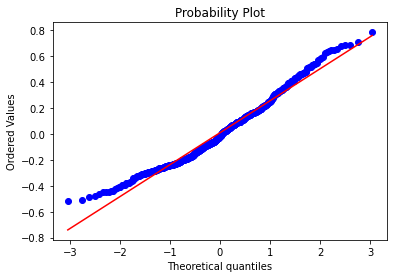

In [1105]:
# Sol dağılım regresyon modeli hatalarının normal dağılım tablosu.
# Tabloya bakıldığında hataların normal olmadığı gözüküyor.
import pylab
stats.probplot(valuess.error, dist="norm", plot=pylab)
pylab.show()

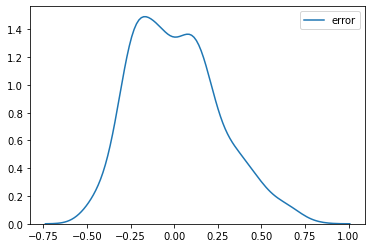

In [1106]:
#Grafiğe bakınca hatalar normal dağılıma yakın diyebiliriz.
sns.kdeplot(valuess.error) 

In [1107]:
# Shapiro testi hataların normal dağılımdan gelmediğini söylüyor
shapiro(valuess.error)

(0.9771984219551086, 6.208426839293679e-08)

## Sağ Dağılım Modeli

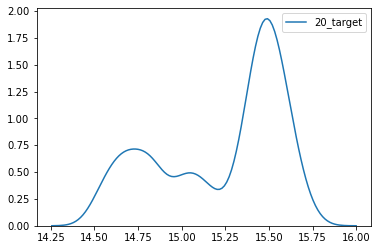

In [1108]:
sns.kdeplot(rightDist.iloc[:,-3])

In [1109]:
# Object olan kolonların çıkarılması
dropNames=[]
leftColumnNumbers =[]
for i in range (len(rightDist.columns)):
    
    if (rightDist.dtypes[i]==object):
        dropNames.append(rightDist.columns[i])
        
rightDist=rightDist.drop(columns=dropNames)   

In [1110]:
rightDist.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
14,29,34,42.857143,0.000000,42.857143,51.655776,5.410806,15.55,11.54,11.40,...,0.005016,42.3,-42.2,-54,0.0,0.304762,0.614092,15.139198,0.000000,-37.006053


In [1111]:
# sağ taraftaki dağılımdan targetlerin çıkartılıp X değerlerinin oluşturulması
right_X=rightDist.iloc[:,:-3]

In [1112]:
#Sağ taraftaki dağılımın X değerlerinin multicollinearity testinin yapılması
#VIF determines the strength of the correlation between the independent variables. 
#It is predicted by taking a variable and regressing it against every other variable. 
vifRight = [variance_inflation_factor(right_X.values, i) for i in range(right_X.shape[1])]


In [1113]:
columnNames = right_X.columns

In [1114]:
# vif değerlerinin ve karşılık gelen kolonların oluşturulması
newDf=pd.DataFrame(vifRight,columnNames)
newDf.columns = ["Vif Degeri"]
newDf.head()

,Vif Degeri
ind_5,1827.501745
ind_6,1137.948389
ind_8,inf
ind_9,inf
ind_10,inf


In [1115]:
#20' dan küçük vif değerlerinin olduğu  değişkenler ile yeni bir dataframe oluşturulması.
cleanRightData=rightDist.loc[:,newDf.iloc[:][newDf["Vif Degeri"] < 10].index]

In [1116]:
cleanRightData = pd.concat([cleanRightData, rightDist.iloc[:,-3]], axis=1, sort=False)

In [1117]:
cleanRightData.head(1)

,ind_28,ind_53,ind_62,ind_83,ind_88,ind_134,ind_172,ind_176,ind_217,ind_239,...,ind_338,ind_340,ind_344,ind_347,ind_352,ind_397,ind_412,ind_416,ind_424,20_target
0,66.666667,24,10,8,0.000517,6,8.133485,-39.935439,1,0.000217,...,1.197238,-0.319064,0.0,0.0,0.0,-26.386973,0.002371,-49.6,1.0,15.135802


In [1118]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val >= 0.5 or val <=-0.5 else 'black'
    return 'color: %s' % color

In [1119]:
corrDF=round(cleanRightData.corr(),3)

In [1120]:
corrDF.style.applymap(color_negative_red)

,ind_28,ind_53,ind_62,ind_83,ind_88,ind_134,ind_172,ind_176,ind_217,ind_239,ind_309,ind_310,ind_315,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_347,ind_352,ind_397,ind_412,ind_416,ind_424,20_target
ind_28,1,0.509,0.064,0.014,-0.003,0.552,0.034,-0.141,0.026,-0.012,0.012,-0.001,-0.014,-0.008,-0.002,-0.001,0.002,0.002,-0.014,0.018,0.025,-0.016,-0.002,-0.444,0.008,-0.092,0.562,0.012
ind_53,0.509,1,0.335,0.079,-0,0.685,0.243,-0.067,-0.042,-0.059,-0.004,0.003,-0.007,-0.028,0.003,-0.015,0.035,-0.048,0.034,0.012,0.011,-0.017,0.032,-0.499,0.074,-0.198,0.679,0.038
ind_62,0.064,0.335,1,0.312,-0.038,0.137,0.07,0.21,-0.269,-0.186,-0.115,0.006,-0.062,-0.305,0.172,-0.09,0.186,-0.254,0.231,-0.131,-0.107,0.088,0.051,-0.144,0.445,-0.356,0.175,0.044
ind_83,0.014,0.079,0.312,1,-0.013,0.024,0.03,0.017,-0.294,0.006,0.155,-0.04,-0.271,-0.353,0.276,-0.364,0.401,-0.235,0.245,-0.144,-0.106,0.088,0.039,-0.008,0.204,-0.189,0.058,0.268
ind_88,-0.003,-0,-0.038,-0.013,1,0.169,-0.004,-0.035,0.007,-0.015,0.023,-0.027,0.005,0.09,-0.054,-0.009,-0.01,0.029,-0.018,0.012,0.047,-0.043,-0.037,-0.086,-0.038,0.039,-0.018,-0.028
ind_134,0.552,0.685,0.137,0.024,0.169,1,0.09,-0.149,-0.007,-0.024,0.011,-0.006,-0.013,-0,-0.006,0.006,-0.001,-0.016,-0.001,0.023,0.026,-0.02,0.005,-0.48,0.022,-0.101,0.511,0.018
ind_172,0.034,0.243,0.07,0.03,-0.004,0.09,1,-0.192,0.018,0.037,0.011,-0.004,-0.035,0.088,-0.032,0.021,-0.027,0.031,-0.022,-0.031,0.071,-0.047,-0.049,-0.086,0.003,0.048,0.133,-0.006
ind_176,-0.141,-0.067,0.21,0.017,-0.035,-0.149,-0.192,1,0.04,-0.121,-0.057,-0.029,0.005,-0.079,0.031,-0.036,0.051,-0.03,0.009,0.066,-0.009,0.012,-0.042,0.154,-0.014,-0.152,-0.098,0.05
ind_217,0.026,-0.042,-0.269,-0.294,0.007,-0.007,0.018,0.04,1,-0.11,0.008,-0.057,0.108,0.171,-0.162,0.091,-0.136,0.157,-0.12,0.082,0.052,-0.031,-0.032,0.005,-0.248,0.077,-0.002,0.025
ind_239,-0.012,-0.059,-0.186,0.006,-0.015,-0.024,0.037,-0.121,-0.11,1,0.096,-0.037,-0.059,0.047,0.02,-0.076,0.01,0.019,-0.029,0.037,0.061,-0.058,-0.023,0.041,-0.156,0.009,-0.049,0.021


In [1121]:
# X ve y lerin ayrışması
y = cleanRightData["20_target"]
X=cleanRightData.iloc[:,:-1]
X=sm.add_constant(X)

In [1122]:
# Train - Split yapılıp daha sonrası için modelin doğruluğunun test edilmesi
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

In [1123]:
# Train verileri ile modelin eğitilmesi
#Sağ taraftaki dağılıma göre r square değerimiz 0.417. Bütün verilere göre kurulan modele göre değeri çok yükselmiş durumda.
lm= sm.OLS(y_train,X_train) 
modelRight = lm.fit()
modelRight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     61.11
Date:                Thu, 23 Jul 2020   Prob (F-statistic):          1.40e-246
Time:                        14:30:35   Log-Likelihood:                -264.12
No. Observations:                2331   AIC:                             584.2
Df Residuals:                    2303   BIC:                             745.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9834      0.018    827.198      0.000      14.948      15.019
ind_28      3.708e-05      0.000      0.325      0.745      -0.000       0.000
ind_53         0.0017      0.001      2.743      0.006       0.000       0.003
ind_62         0.0005      0.001      0.782      0.434      -0.001       0.002
ind_83         0.0007      0.001      1.043      0.297      -0.001       0.002
ind_88       -20.7103     10.428     -1.986      0.047     -41.160      -0.261
ind_134       -0.0005      0.001     -0.502      0.615      -0.003       0.002
ind_172       -0.0004      0.000     -1.248      0.212      -0.001       0.000
ind_176        0.0004      0.000      1.297      0.195      -0.000       0.001
ind_217        0.0384      0.007      5.835      0.000       0.026       0.051
ind_239      -97.7112     52.769     -1.852      0.064    -201.191       5.769
ind_309     1075.2084     93.844     11.457      0.000     891.180    1259.237
ind_310       -0.1899      0.014    -13.987      0.000      -0.217      -0.163
ind_315       -0.1224      0.008    -14.424      0.000      -0.139      -0.106
ind_324       78.9758     52.888      1.493      0.136     -24.737     182.689
ind_327        0.0028      0.000     13.485      0.000       0.002       0.003
ind_330       -0.0211      0.020     -1.049      0.294      -0.060       0.018
ind_332        0.0020      0.000      6.908      0.000       0.001       0.003
ind_334     -852.8774    142.880     -5.969      0.000   -1133.065    -572.690
ind_338       -0.0360      0.033     -1.107      0.268      -0.100       0.028
ind_340        0.1181      0.064      1.857      0.063      -0.007       0.243
ind_344      497.5978    201.253      2.473      0.013     102.943     892.253
ind_347        0.0010      0.001      0.831      0.406      -0.001       0.003
ind_352        0.0008      0.002      0.410      0.682      -0.003       0.004
ind_397        0.0013      0.001      1.107      0.268      -0.001       0.004
ind_412       -7.4408      1.170     -6.358      0.000      -9.736      -5.146
ind_416        0.0016      0.000      4.098      0.000       0.001       0.002
ind_424       -0.0316      0.020     -1.615      0.106      -0.070       0.007
==============================================================================
Omnibus:                      178.595   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.570
Skew:                          -0.505   Prob(JB):                     8.12e-31
Kurtosis:                       2.362   Cond. No.                     2.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+06. This might i

In [1124]:
# p >0.05 olan değişkenlerin denklemden çıkartılıp modelin tekrar kurulması
X_train = X_train[modelRight.pvalues[modelRight.pvalues<0.05].index]
X_train.head(1)

,const,ind_53,ind_88,ind_217,ind_309,ind_310,ind_315,ind_327,ind_332,ind_334,ind_344,ind_412,ind_416
4753,1.0,12,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004013,-22.4


In [1125]:
# Adjusted R square'deki değişim çok az durumda.Yani modelde bir farklılık oluşmadı. kolon sayısı 27'den 14'e düştü
lm= sm.OLS(y_train,X_train) 
modelRight = lm.fit()
modelRight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              20_target   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     135.1
Date:                Thu, 23 Jul 2020   Prob (F-statistic):          2.90e-256
Time:                        14:30:38   Log-Likelihood:                -275.89
No. Observations:                2331   AIC:                             577.8
Df Residuals:                    2318   BIC:                             652.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9541      0.014   1074.801      0.000      14.927      14.981
ind_53         0.0008      0.000      2.400      0.016       0.000       0.002
ind_88       -21.4087     10.052     -2.130      0.033     -41.121      -1.696
ind_217        0.0389      0.006      6.159      0.000       0.027       0.051
ind_309     1036.4114     92.126     11.250      0.000     855.753    1217.070
ind_310       -0.1829      0.013    -13.951      0.000      -0.209      -0.157
ind_315       -0.1214      0.008    -15.491      0.000      -0.137      -0.106
ind_327        0.0027      0.000     15.716      0.000       0.002       0.003
ind_332        0.0023      0.000     12.545      0.000       0.002       0.003
ind_334     -700.1408     72.483     -9.659      0.000    -842.279    -558.002
ind_344      366.9321    113.374      3.236      0.001     144.607     589.257
ind_412       -7.0704      1.029     -6.872      0.000      -9.088      -5.053
ind_416        0.0014      0.000      3.750      0.000       0.001       0.002
==============================================================================
Omnibus:                      175.156   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.135
Skew:                          -0.500   Prob(JB):                     2.75e-30
Kurtosis:                       2.367   Cond. No.                     9.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1127]:
# test kolonlarının train kolonlarıyla eşleşmesi
X_test =X_test[X_train.columns]

In [1128]:
# test verilerinin tahmin sonuçları
valuess=pd.DataFrame({"predicted" : modelRight.predict(X_test) , "Expected" : y_test, "error" : y_test - modelRight.predict(X_test) ,"errorSquare" :(y_test - modelRight.predict(X_test))*(y_test - modelRight.predict(X_test)) })
valuess

,predicted,Expected,error,errorSquare
2869,15.404639,15.660107,0.255469,0.065264
5316,15.206944,14.746567,-0.460378,0.211948
5153,15.048388,14.695130,-0.353258,0.124791
1328,15.441921,15.411223,-0.030698,0.000942
71,15.473410,15.107129,-0.366282,0.134162
...,...,...,...,...
5730,14.964884,14.605838,-0.359046,0.128914
1220,15.156776,15.556982,0.400206,0.160165
2679,15.324303,15.422667,0.098365,0.009676
3688,15.440635,15.561635,0.121000,0.014641


#### Sağ Modelin Test verileri ile R-square değeri

In [1129]:
# Tahmin Edilen X değerlerinin R-square değeri
RKT = (valuess["predicted"]-valuess["Expected"].mean())*(valuess["predicted"]-valuess["Expected"].mean())
GKT = (valuess["Expected"]-valuess["Expected"].mean())*(valuess["Expected"]-valuess["Expected"].mean())
RKT=sum(RKT)
GKT=sum(GKT)
rSquare = RKT/GKT
print ("Sağdaki modelin test edilmesi sonucu R-square değeri: {} ".format(rSquare))

Sağdaki modelin test edilmesi sonucu R-square değeri: 0.38860614822182826 


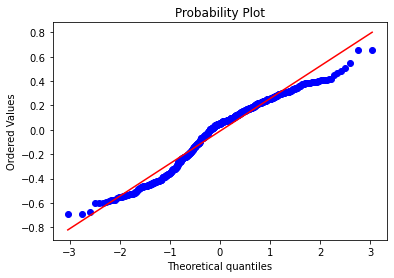

In [1130]:
# Sağ dağılım regresyon modeli hatalarının normal dağılım tablosu.
# Tabloya bakıldığında hataların normal olmadığı gözüküyor.
import pylab
stats.probplot(valuess.error, dist="norm", plot=pylab)
pylab.show()

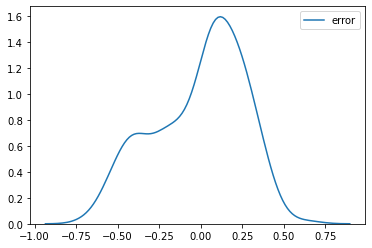

In [1131]:
#Grafiğe bakınca hatalar normal dağılım olmadığı gözüküyor.
sns.kdeplot(valuess.error) 

## Tüm verilerin Karar Ağacı Regresyonu ile tahmin edilmesi

In [1135]:
# Object olan kolonların çıkarılması
dropNames=[]
leftColumnNumbers =[]
for i in range (len(data3.columns)):
    
    if (data3.dtypes[i]==object):
        dropNames.append(data3.columns[i])
        
data3=data3.drop(columns=dropNames)  

In [1136]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict
X=data3.iloc[:,:-3]
y=data3["20_target"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state =0)


In [1138]:
clf = DecisionTreeRegressor()
clf.fit(X_train.values, y_train.values.reshape(-1,1))
predicted = clf.predict(X_test.values)
expected = y_test

In [1141]:
# test verilerinin tahmin sonuçları
valuess=pd.DataFrame({"predicted" : predicted , "Expected" : expected, "error" : expected - predicted ,"errorSquare" :(expected - predicted)*(expected - predicted) })
valuess

,predicted,Expected,error,errorSquare
1411,-15.517492,15.460396,30.977889,959.629587
4757,-14.794608,14.788697,29.583305,875.171946
4822,-14.810957,-14.810957,0.000000,0.000000
1657,-15.593579,-15.595088,-0.001509,0.000002
4933,-14.720785,-14.726067,-0.005282,0.000028
...,...,...,...,...
3151,-15.435747,-15.438010,-0.002264,0.000005
933,-15.565408,0.000000,15.565408,242.281930
2832,15.550568,15.600873,0.050305,0.002531
3595,15.047391,-15.608545,-30.655936,939.786410


In [1143]:
# Tahmin Edilen X değerlerinin R-square değeri
RKT = (valuess["predicted"]-valuess["Expected"].mean())*(valuess["predicted"]-valuess["Expected"].mean())
GKT = (valuess["Expected"]-valuess["Expected"].mean())*(valuess["Expected"]-valuess["Expected"].mean())
RKT=sum(RKT)
GKT=sum(GKT)
rSquare = RKT/GKT
print ("Decision Tree modelinin test edilmesi sonucu R-square değeri: {} ".format(rSquare))

Decision Tree modelinin test edilmesi sonucu R-square değeri: 1.0024836635284176 
